In [8]:
import sys
sys.path.insert(0,'..')

from src.models import *
from src.loss_functions import *
from src.noise import *
from src.metrics import *
from src.plotting import *
from src.generate_data import *
from src.real_data import *
from src.abstain import *

import sklearn
import pandas as pd

from scipy.stats import bernoulli

from operator import xor

import os


In [9]:
# Define parameters
dataset = "cshock_eicu"
noise_type = "class_conditional"
batch_size = 1024
n_draws = 5
model_type = "LR"
training_loss = "None"
n_models = 50
max_iter = 1000
epsilon = 0.1
misspecify = "correct"


In [10]:
parent_dir = "/scratch/hdd001/home/snagaraj/"
files_path = os.path.join(parent_dir, "results", "abstain", dataset, model_type, noise_type, "correct")

pkl_path = os.path.join(files_path, f"{epsilon}.pkl")
csv_path = os.path.join(files_path, "results.csv")

    # Open a file for writing in binary mode
with open(pkl_path, 'rb') as file:
    # Use pickle to write the dictionary to the file
    data = pkl.load(file)


results = pd.read_csv(csv_path)
results = results[results["method"].isin(["ambiguity", "confidence"])]

In [11]:
results

,metric,value,coverage,threshold,noise,loss,draw_id,method,experiment_type
0,risk,23.988439,100.000000,0.00,0.05,BCE,0,confidence,abstain
1,regret,2.890173,100.000000,0.00,0.05,BCE,0,confidence,abstain
2,fpr,2.023121,100.000000,0.00,0.05,BCE,0,confidence,abstain
3,fnr,0.867052,100.000000,0.00,0.05,BCE,0,confidence,abstain
4,risk,23.988439,100.000000,0.00,0.05,BCE,0,ambiguity,abstain
...,...,...,...,...,...,...,...,...,...
14764,risk,0.000000,1.011561,0.99,0.40,BCE,4,ambiguity,abstain
14765,regret,0.000000,1.011561,0.99,0.40,BCE,4,ambiguity,abstain
14766,fpr,0.000000,1.011561,0.99,0.40,BCE,4,ambiguity,abstain
14767,fnr,0.000000,1.011561,0.99,0.40,BCE,4,ambiguity,abstain


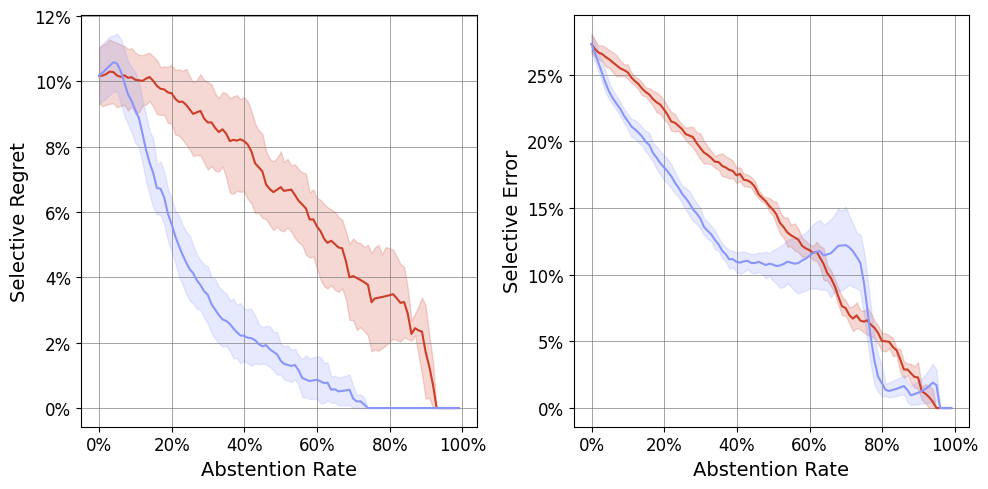

In [32]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tqdm import tqdm

# List of datasets and renamed titles
datasets = ["cshock_eicu", "cshock_mimic", "support", "lungcancer"]
dataset_titles = {
    "cshock_eicu": "shock_eicu",
    "cshock_mimic": "shock_mimic",
    "saps": "mortality",
    "support": "support",
    "lungcancer": "lungcancer"
}


# Metrics to plot
metrics = [ "regret", "risk"]

# Define your custom color palette for each method
method_colors = {
    "Ambiguity": "#8896FB",  # Purple
    "Majority":  "#800080",  # Red
    "Loo":  "#00FF00",
    "Mean_plausible":  "#228B22",
    "Conformal": "#93C572",
    "Confidence": "#ce3d26",
    "Entropy": "#2478d8"# Grey
}

y_labels = {"regret": "Selective Regret",
           "risk": "Selective Error",
           "fpr": "FPR",
           "fnr": "FNR/Overreliance"}

# Create a figure with 2 rows (one for each metric) and 6 columns (one for each dataset)
fig, axes = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5), sharex=True)


# Loop through each dataset and plot the metrics
for idx, metric in enumerate(metrics):

    # Read the data for the dataset
    #data = pd.read_csv(f"/h/snagaraj/noise_multiplicity/results/abstain_metrics_{dataset}_{noise_type}_{model_type}_{fixed_class}_{fixed_noise}_{misspecify}.csv")
    #data = pd.read_csv(f"/h/snagaraj/noise_multiplicity/results/abstain_metrics_{dataset}_{noise_type}_{model_type}_{noise_level}_{misspecify}.csv")
    
    
    
    # Capitalize first letter of the method names to match color mapping
    results['method'] = results['method'].str.capitalize()

    results["abstention"] = 100-results["coverage"]
    
    
    
    
#     data = data[(data["method"]!= 'Unanticipated')]
#     data = data[(data["method"]!= 'Actual')]

    # Subset data based on loss_type and noise_level if needed
    loss_type = "BCE"
    noise_level = 0.2
    sub_data = results[(results["loss"] == loss_type) 
                       & (results["noise"] == noise_level)
                      #& (results["coverage"] >50)
                      & (results["experiment_type"] == "abstain") ]

    # Plot each metric in its respective position in the grid

    ax = axes[idx]

    # For each method, plot the line for the selected metric
    for method in sub_data['method'].unique():
        #if method != "Ambiguity":
        method_data = sub_data[(sub_data['method'] == method) & (sub_data['metric'] == metric)]
        sns.lineplot(data=method_data, x="abstention", y="value", ax=ax, color=method_colors.get(method, "#808080"), label=method)

    # Set labels and grid
    ax.set_xlabel("Abstention Rate", fontsize=14)

    ax.set_ylabel(y_labels[metric], fontsize=14)
    ax.yaxis.get_major_locator().set_params(integer=True)
    
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
        

    ax.grid(True, which='both', color='grey', linestyle='-', linewidth=0.5)
    ax.tick_params(axis='both', which='major', labelsize=12)

    # Remove individual plot legends
    ax.legend().remove()

   
plt.tight_layout()

plt.savefig('/h/snagaraj/noise_multiplicity/figures/abstain.pdf', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [35]:
sub_data[
        (sub_data["coverage"] >= 59) & 
        (sub_data["coverage"] <= 61) & 
        (sub_data["metric"] == "regret") & 
        (sub_data["noise"] == 0.2)].groupby("method").mean(numeric_only=True)  


,value,coverage,threshold,noise,draw_id,abstention
method,,,,,,
Ambiguity,2.181564,59.609827,0.405,0.2,2.0,40.390173
Confidence,8.120768,59.609827,0.405,0.2,2.0,40.390173


In [31]:
8.12-2.18

5.9399999999999995